# COM6031 CW1 

## Scenario 8 (Support Ticket System) - Chain of Responsibilities Pattern
In this scenario the **Chain of Responsibilities pattern** will be used to implement a simple **Support Ticket System**.

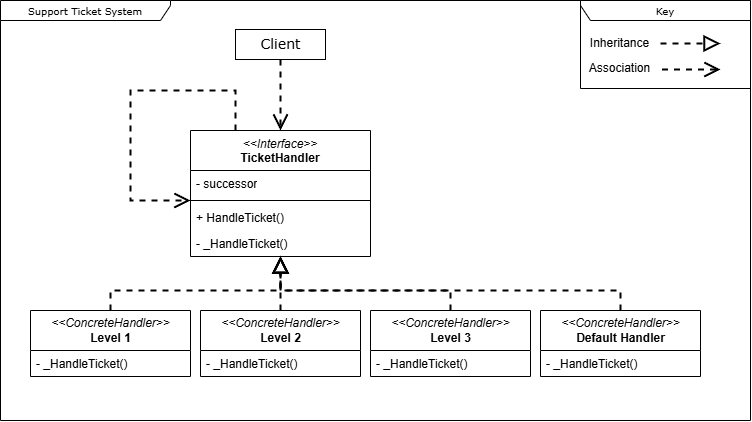

The **generic ‘TicketHandler’** interface **defines the main request handling method** which is responsible for handling the request with the private internal handler and, **if not handled, passing the request on to the successor** handler.
There are **four levels of handlers** in this example. **Level 1**, for **simple requests**. **Level 2**, for **moderate requests**. **Level 3** for **complex requests**. Finally, the **default handler** should handle all **requests that do not fit the criteria of the first three handlers**.
The ‘client’ in this example is a simple demonstration of the instantiation of a chain of handlers that handle a selection of tickets.


## Interfaces

### Generic Ticket Handler

In [1]:
class TicketHandler():
    """Generic Ticket Handler which defines calling successor behaviour
    """
    def __init__(self, successor):
        """Initialise private successor variable

        Args:
            successor (TicketHandler): Ticket Handler to handle the request if not handled by current handler.
        """
        self._successor = successor     # Initialise private successor variable to passed in TicketHandler

    def HandleTicket(self, ticket):
        """Default Handle ticket behaviour not to be overridden

        Args:
            ticket (string): String description of support ticket
        """
        handled = self._HandleTicket(ticket)        # Call private handling function and store result

        if not handled:                             # If not handled by this handler,
            self._successor.HandleTicket(ticket)    # send the request to the successor.

    def _HandleTicket(self, ticket):
        """Private ticket handler to be overridden by child classes
        """
        pass

## Concrete Implementations

### Ticket Handlers

In [2]:
class Level1(TicketHandler):
    """Simple ticket handler
    """
    def _HandleTicket(self, ticket):
        """Private ticket handler

        Args:
            ticket (string): Ticket to be handled

        Returns:
            boolean: Ticket handled?
        """
        if "error" in ticket:                                                   # If the ticket contains "error",
            print(f'Support Ticket: "{ticket}" handled by Level 1 support')     # Print feedback to console,
            # Handle Support Ticket here
            return True                                                         # Return true to indicate ticket has been handled
        return False                                                            # Otherwise return false to indicate ticket has NOT been handled

class Level2(TicketHandler):
    """Moderate ticket handler
    """
    def _HandleTicket(self, ticket):
        """Private ticket handler

        Args:
            ticket (string): Ticket to be handled

        Returns:
            boolean: Ticket handled?
        """
        if (("issue" in ticket) or ("warning" in ticket)):                      # If the ticket contains "issue" or "warning",
            print(f'Support Ticket: "{ticket}" handled by Level 2 support')     # Print feedback to console,
            # Handle Support Ticket here
            return True                                                         # Return true to indicate ticket has been handled
        return False                                                            # Otherwise return false to indicate ticket has NOT been handled

class Level3(TicketHandler):
    """Complex ticket handler
    """
    def _HandleTicket(self, ticket):
        """Private ticket handler

        Args:
            ticket (string): Ticket to be handled

        Returns:
            boolean: Ticket handled?
        """
        if (("feature" in ticket) or ("critical" in ticket)):                   # If the ticket contains "feature" or "critical",
            print(f'Support Ticket: "{ticket}" handled by Level 3 support')     # Print feedback to console,
            # Handle Support Ticket here
            return True                                                         # Return true to indicate ticket has been handled
        return False  

### Default Handler

In [3]:
class DefaultHandler(TicketHandler):
    """Default ticket handler
    """
    def _HandleTicket(self, ticket):
        
        """Private ticket handler

        Args:
            ticket (string): Ticket to be handled

        Returns:
            boolean: Ticket handled?
        """
        print(f'Support Ticket: "{ticket}" handled by customer management')     # Print feedback to console
        # Handle Support Ticket here
        return True 

## Client

In [4]:
""" Client """
if __name__ == "__main__":
    support_ticket_handler = Level1(Level2(Level3(DefaultHandler(None))))       # Setting up order of event handlers (Chain of Responsibilities)

    """ Defining example support ticket """
    simple_ticket = "Please can you help. I am experiencing an error in Microsoft Word."
    moderate_ticket = "Microsoft Excel is giving me a warning. please help."
    complex_ticket = "I am requesting a new feature in our custom service. Please have this done within the next hour."
    undefined_ticket = "I'm not sure if this is the right place to submit this ticket, but the coffee machine is broken."

    """ Handling support tickets """
    support_ticket_handler.HandleTicket(simple_ticket)
    support_ticket_handler.HandleTicket(moderate_ticket)
    support_ticket_handler.HandleTicket(complex_ticket)
    support_ticket_handler.HandleTicket(undefined_ticket)

Support Ticket: "Please can you help. I am experiencing an error in Microsoft Word." handled by Level 1 support
Support Ticket: "Microsoft Excel is giving me a warning. please help." handled by Level 2 support
Support Ticket: "I am requesting a new feature in our custom service. Please have this done within the next hour." handled by Level 3 support
Support Ticket: "I'm not sure if this is the right place to submit this ticket, but the coffee machine is broken." handled by customer management
